In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

training_folder = r'../'
gis_folder = training_folder + r'gis/corse/'
data_folder = training_folder + r'data/corse/'

# chargement des données

In [2]:
nodes = gpd.read_file(gis_folder + r'osmdrive/nodes/nodes.shp')
stops = gpd.read_file(gis_folder + r'stops_corse.shp')
communes = gpd.read_file(gis_folder + r'communes_corse.shp')

In [3]:
commune_node_distance_dataframe = pd.read_hdf(data_folder + 'distance_to_node.hdf', 'communes').reset_index(drop=True)
stop_node_distance_dataframe = pd.read_hdf(data_folder + 'distance_to_node.hdf', 'stops')

# Sélection du nœud le plus proche pour chaque stop et chaque commune

In [4]:
stop_nearest_node = stop_node_distance_dataframe.groupby(
    'stop', as_index=False)['stop_node'].first()

In [5]:
commune_nearest_node = commune_node_distance_dataframe.groupby(
    'commune', as_index=False)['commune_node'].first()

In [6]:
stop_nearest_node.head()

,stop,stop_node
0,0,394695922
1,1,276984551
2,2,245916772
3,3,258557760
4,4,339875414


In [7]:
commune_nearest_node.head()

,commune,commune_node
0,2A001,5795014130
1,2A004,5196875570
2,2A006,1248478336
3,2A008,6421216202
4,2A011,4966564154


In [8]:
commune_nearest_node.to_csv(data_folder+'commune_nearest_node.csv',index=False)
stop_nearest_node.to_csv(data_folder+'stop_nearest_node.csv', index=False)

# Contrôle

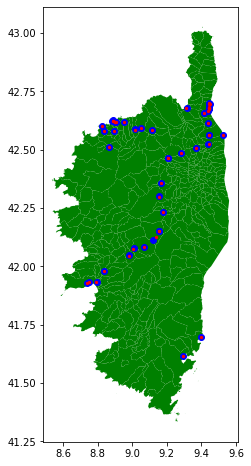

In [9]:
merged = pd.merge(nodes, stop_nearest_node, right_on='stop_node', left_on='osmid')
# On trace pour chaque station : la localisation de la station et du nœud le plus proche
commune_plot = communes.plot(color='green')
stop_plot = stops.plot(ax=commune_plot, color='blue')
merged.plot(ax=stop_plot, color='red', markersize=5)
plt.savefig(r'../plot/stop_nearest_node.png', bbox_inches='tight')

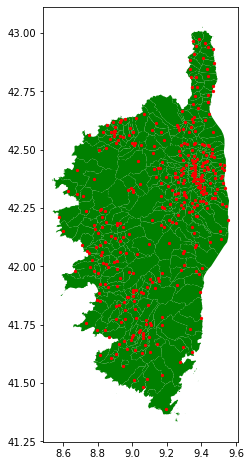

In [10]:
merged = pd.merge(nodes, commune_nearest_node, right_on='commune_node', left_on='osmid')
# On trace pour chaque station : la localisation de la station et du nœud le plus proche
commune_plot = communes.plot(color='green')
merged.plot(ax=commune_plot, color='red', markersize=5)
plt.savefig(r'../plot/commune_nearest_node.png', bbox_inches='tight')